# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B 23Winter/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [9]:
X

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41184,46,383,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
41186,44,442,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


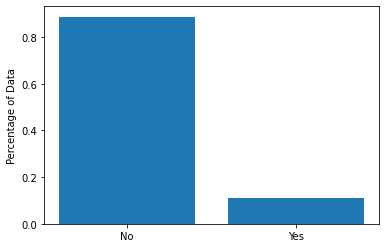

In [10]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [12]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_train = smote.fit_resample(X_train, y_train)

# Scale the data using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.374\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.675\ngini = 0.38\nsamples = 24201\nvalue = [18034, 6167]\nclass = No'),
 Text(0.125, 0.375, 'duration <= -0.692\ngini = 0.456\nsamples = 17133\nvalue = [11100, 6033]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.291\nsamples = 7811\nvalue = [6429, 1382]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9322\nvalue = [4671, 4651]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 4.276\ngini = 0.037\nsamples = 7068\nvalue = [6934, 134]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.031\nsamples = 6991\nvalue = [6881, 110]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.429\nsamples = 77\nvalue = [53, 24]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.675\ngini = 0.403\nsamples = 26959\nvalue = [7546, 19413]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 1.246\ngini = 0.318\nsamples = 22763\nvalue = [4520, 18243]\nclass = Y

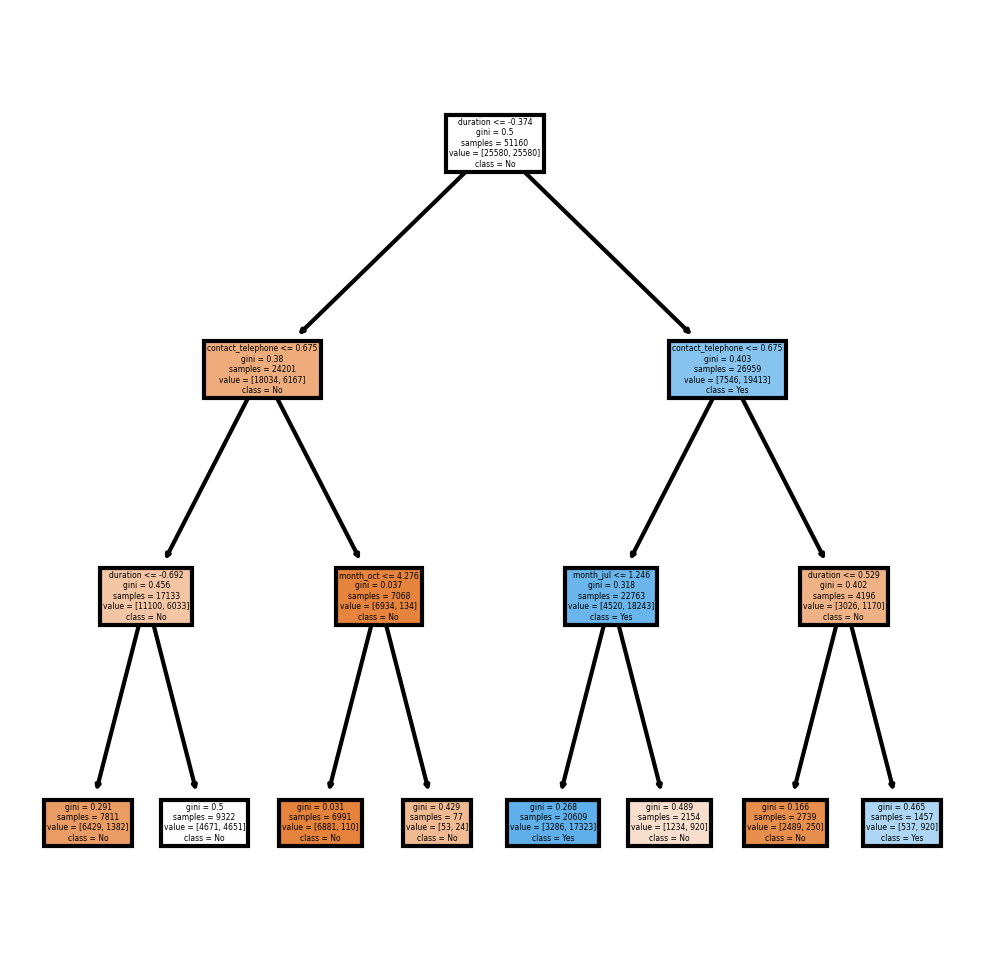

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

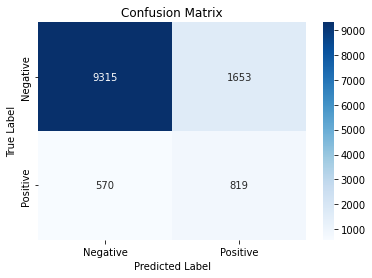

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your decision tree 

In [17]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7882172048231771


In [18]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

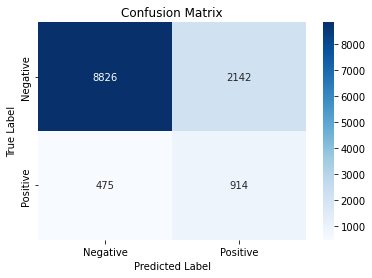

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

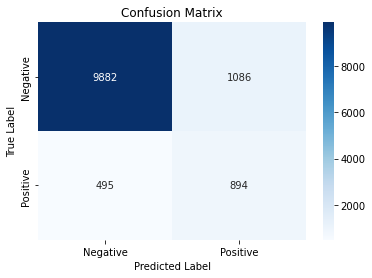

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [24]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [26]:
### SET YOUR BASE LEARNERS

base_learners=[
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

super_learner=SuperLearner(folds=10,random_state=42)
super_learner.add(base_learners)
### FIT TO TRAINING DATA
super_learner.fit(X_scaled,y_train)
### GET base_predictions
base_predictions=super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [27]:
### TRAIN YOUR METALEARNER

In [28]:
log_reg=LogisticRegression().fit(base_predictions,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
### INTERPRET COEFFICIENTS

In [30]:
log_reg.coef_

array([[ 0.49871599,  0.85811681,  1.45135695,  0.49414393, 13.27127543]])

The coefficient presents the importance of the base learner in the super learner model. As you can see, the highest coefficient here is the fifth base learner, with a coefficient of 13. So it means the most important base learner here is the adaboostclassifier with random state equal to 42.

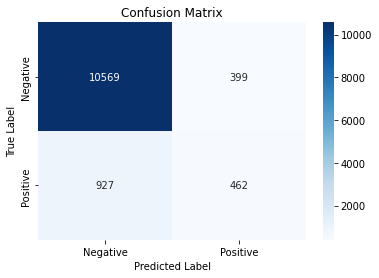

In [31]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true=y_test
y_pred=log_reg.predict(super_learner.predict(X_test))
cm_sl = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_sl, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [32]:
sensitivity_raw = cm_raw[1, 1] / (cm_raw[1, 0] + cm_raw[1, 1])
sensitivity_bag = cm_bag[1, 1] / (cm_bag[1, 0] + cm_bag[1, 1])
sensitivity_boost = cm_boost[1, 1] / (cm_boost[1, 0] + cm_boost[1, 1])
sensitivity_sl = cm_sl[1, 1] / (cm_sl[1, 0] + cm_sl[1, 1])

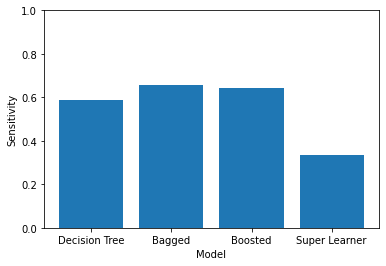

In [33]:
import matplotlib.pyplot as plt

# List of model names and their corresponding sensitivities
model_names = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
sensitivities = [sensitivity_raw,sensitivity_bag,sensitivity_boost,sensitivity_sl]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(model_names, sensitivities)

# Add x and y-axis labels
ax.set_xlabel('Model')
ax.set_ylabel('Sensitivity')

# Set y-axis limits
ax.set_ylim([0, 1])

# Show the plot
plt.show()